In [1]:
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
import numpy as np
import os

import tensorflow as tf
import tensorflow_probability as tfp

2024-06-24 09:49:15.094661: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-24 09:49:15.407226: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# check if this detects GPU - this should not as the virtual env was not built on a GPU
tf.config.list_physical_devices("GPU")

[]

In [3]:
# read in the data

# path to dfs
path_to_TS_dfs = "all_preprocessed_data/Block_0103/TS_ready_data_frames/"

In [4]:
# list the contents here
os.listdir(path_to_TS_dfs)

['extracted_features_sub_window_9.csv',
 'extracted_features_sub_window_10.csv',
 'extracted_features_sub_window_0.csv',
 'extracted_features_sub_window_7.csv',
 'extracted_features_sub_window_6.csv',
 'extracted_features_sub_window_11.csv',
 'extracted_features_sub_window_1.csv',
 'extracted_features_sub_window_8.csv',
 'extracted_features_sub_window_2.csv',
 'extracted_features_sub_window_5.csv',
 '.ipynb_checkpoints',
 'extracted_features_sub_window_4.csv',
 'extracted_features_sub_window_3.csv']

In [5]:
# get rid of the checkpointing folder
sub_image_files = [file for file in os.listdir(path_to_TS_dfs) if file[-3:] == 'csv']

In [6]:
sub_image_files.sort() #note that this would not properly sort the df files as the names are all characters
sub_image_files

['extracted_features_sub_window_0.csv',
 'extracted_features_sub_window_1.csv',
 'extracted_features_sub_window_10.csv',
 'extracted_features_sub_window_11.csv',
 'extracted_features_sub_window_2.csv',
 'extracted_features_sub_window_3.csv',
 'extracted_features_sub_window_4.csv',
 'extracted_features_sub_window_5.csv',
 'extracted_features_sub_window_6.csv',
 'extracted_features_sub_window_7.csv',
 'extracted_features_sub_window_8.csv',
 'extracted_features_sub_window_9.csv']

In [7]:
# add the 10, 11 at the end
im_files = ['extracted_features_sub_window_10.csv', 'extracted_features_sub_window_11.csv']

In [8]:
other_files = [i for i in sub_image_files if i not in im_files]

In [9]:
sub_image_files = other_files + im_files

In [10]:
sub_image_files

['extracted_features_sub_window_0.csv',
 'extracted_features_sub_window_1.csv',
 'extracted_features_sub_window_2.csv',
 'extracted_features_sub_window_3.csv',
 'extracted_features_sub_window_4.csv',
 'extracted_features_sub_window_5.csv',
 'extracted_features_sub_window_6.csv',
 'extracted_features_sub_window_7.csv',
 'extracted_features_sub_window_8.csv',
 'extracted_features_sub_window_9.csv',
 'extracted_features_sub_window_10.csv',
 'extracted_features_sub_window_11.csv']

In [11]:
# just get a df for a single sub image
sub_image_df_name = 'extracted_features_sub_window_0.csv'
sub_image_df_path = os.path.join(path_to_TS_dfs, sub_image_df_name)

In [12]:
sub_image_0_df = pd.read_csv(sub_image_df_path)

In [13]:
sub_image_0_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,tassel_count
0,0.047808,0.0,0.163277,0.0,0.0,0.139760,0.118066,0.119409,0.126903,0.0,...,0.0,0.0,0.074895,0.166230,0.0,0.175070,0.0,0.0,0.234499,3.000005
1,0.051878,0.0,0.199874,0.0,0.0,0.173280,0.152892,0.153999,0.185454,0.0,...,0.0,0.0,0.120129,0.210222,0.0,0.216824,0.0,0.0,0.299341,4.000000
2,0.028427,0.0,0.146221,0.0,0.0,0.107724,0.101584,0.091895,0.107017,0.0,...,0.0,0.0,0.051440,0.120263,0.0,0.135184,0.0,0.0,0.200811,4.000155
3,0.067860,0.0,0.194141,0.0,0.0,0.167222,0.153346,0.156017,0.171351,0.0,...,0.0,0.0,0.114997,0.195980,0.0,0.199689,0.0,0.0,0.285783,8.004741
4,0.000000,0.0,0.159352,0.0,0.0,0.127940,0.099525,0.103640,0.109911,0.0,...,0.0,0.0,0.059292,0.179243,0.0,0.174193,0.0,0.0,0.228390,4.000000


In [14]:
sub_image_0_df.shape

(20, 33)

In [15]:
# how does the sub count variation look like for this subwindow??

# we have 20 time points
range_time_points = np.arange(1,21)

tassel_counts = sub_image_0_df['tassel_count']

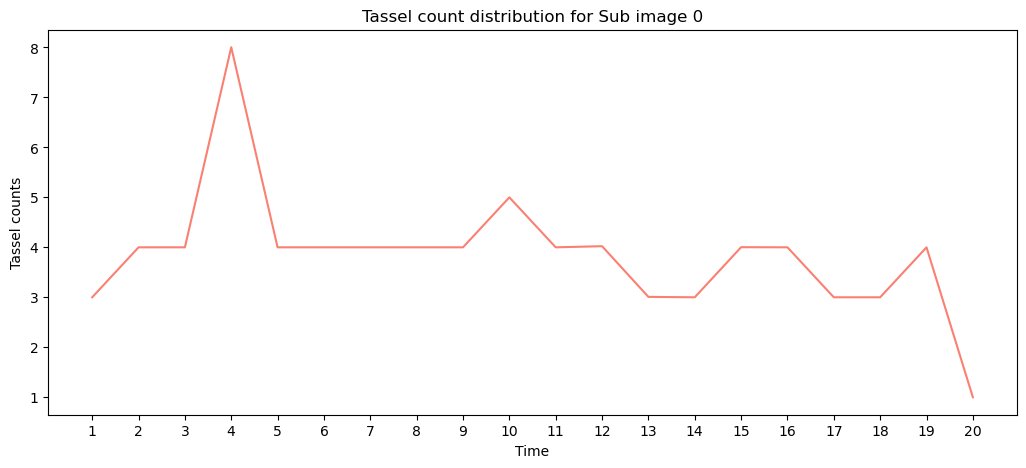

In [16]:
# look at this distribution
plt.figure(figsize = (12.5,5))
plt.plot(range_time_points, tassel_counts, color = 'salmon')
plt.xticks(range_time_points)
plt.title("Tassel count distribution for Sub image 0")
plt.xlabel("Time")
plt.ylabel("Tassel counts")
plt.show()

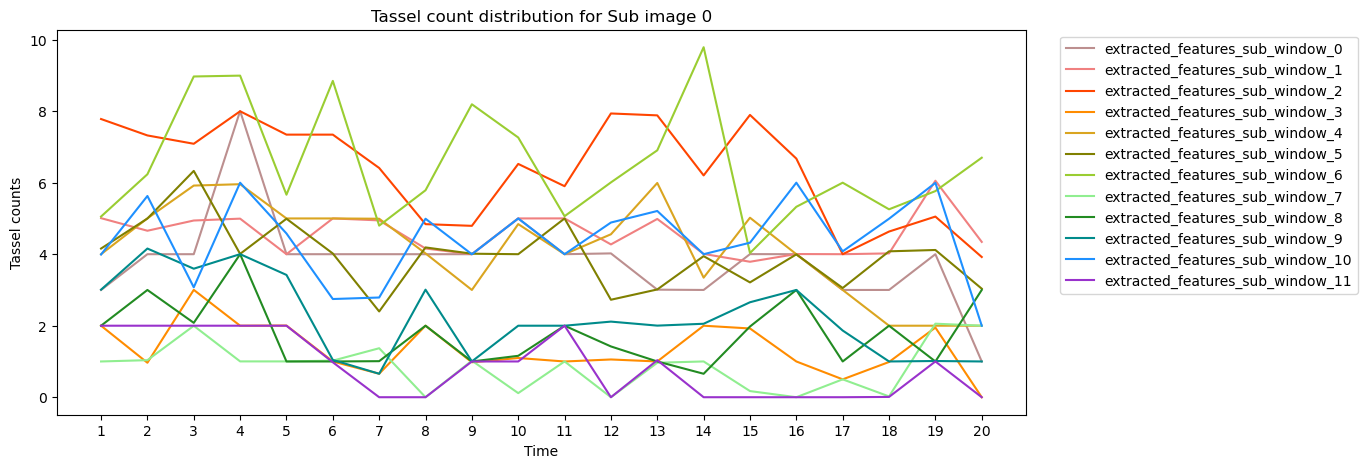

In [17]:
# Also draw a plot for all 12 subwindows on the same plot to see how the tassel count distributions look like?
colors = ['rosybrown', 'lightcoral', 'orangered', 'darkorange', 'goldenrod', 'olive', 'yellowgreen', 'lightgreen', 'forestgreen', 'darkcyan', 'dodgerblue',
         'darkorchid']
plt.figure(figsize = (12.5,5))
counter = 0
for file in sub_image_files:
    joined_path = os.path.join(path_to_TS_dfs, file)
    read_df = pd.read_csv(joined_path)
    tass_count = read_df['tassel_count']
    plt.plot(range_time_points, tass_count, color = colors[counter], label = file.split(".")[0])
    counter = counter + 1
plt.xticks(range_time_points)
plt.title("Tassel count distribution for Sub image 0")
plt.xlabel("Time")
plt.ylabel("Tassel counts")
plt.legend()
plt.legend(bbox_to_anchor=(1.35, 1), loc = 1)
plt.show()

In [18]:
# Okay, none of the plots look nice, but that's okay I guess

In [19]:
# Okay, lets now divide our data into train and test components: I'm thinking a 13-7 split (thats a 65%-35%, maybe too little data in the train split, lets change this later and stick to this for now)

In [20]:
13/20

0.65

In [21]:
forecast_steps = 7

In [22]:
train_data = sub_image_0_df.iloc[:-7, :]
test_data = sub_image_0_df.iloc[-7:, :]

In [23]:
train_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,tassel_count
0,0.047808,0.0,0.163277,0.0,0.0,0.139760,0.118066,0.119409,0.126903,0.0,...,0.0,0.0,0.074895,0.166230,0.0,0.175070,0.0,0.0,0.234499,3.000005
1,0.051878,0.0,0.199874,0.0,0.0,0.173280,0.152892,0.153999,0.185454,0.0,...,0.0,0.0,0.120129,0.210222,0.0,0.216824,0.0,0.0,0.299341,4.000000
2,0.028427,0.0,0.146221,0.0,0.0,0.107724,0.101584,0.091895,0.107017,0.0,...,0.0,0.0,0.051440,0.120263,0.0,0.135184,0.0,0.0,0.200811,4.000155
3,0.067860,0.0,0.194141,0.0,0.0,0.167222,0.153346,0.156017,0.171351,0.0,...,0.0,0.0,0.114997,0.195980,0.0,0.199689,0.0,0.0,0.285783,8.004741
4,0.000000,0.0,0.159352,0.0,0.0,0.127940,0.099525,0.103640,0.109911,0.0,...,0.0,0.0,0.059292,0.179243,0.0,0.174193,0.0,0.0,0.228390,4.000000


In [24]:
train_data.shape

(13, 33)

In [25]:
test_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,tassel_count
13,0.00000,0.000000,0.090929,0.051619,0.069533,0.037809,0.000000,0.000000,0.000000,0.049247,...,0.00000,0.045774,0.000000,0.074290,0.044656,0.092893,0.034058,0.029722,0.106921,3.000000
14,0.00000,0.006621,0.058541,0.037966,0.077929,0.000000,0.000000,0.000000,0.000000,0.054486,...,0.00000,0.073907,0.000000,0.050342,0.037198,0.074999,0.016264,0.056195,0.069757,4.002516
15,0.02545,0.000000,0.140345,0.034087,0.046189,0.109946,0.097038,0.095738,0.101402,0.031138,...,0.00000,0.023231,0.055358,0.134033,0.026537,0.139289,0.022806,0.000000,0.182940,4.000155
16,0.00000,0.164403,0.000000,0.182039,0.259804,0.000000,0.000000,0.000000,0.000000,0.166868,...,0.11707,0.214212,0.000000,0.000000,0.167544,0.000000,0.106120,0.237557,0.000000,3.000000
17,0.00000,0.082463,0.000000,0.069955,0.169646,0.000000,0.000000,0.000000,0.000000,0.101381,...,0.05950,0.148836,0.000000,0.000000,0.081987,0.000000,0.037315,0.159811,0.000000,3.000000


In [26]:
test_data.shape

(7, 33)

In [27]:
# Okay, let's plot the data as train and test as per the chapter 6 of the Bayesian computations book

In [28]:
train_counts = train_data['tassel_count']
test_counts = test_data['tassel_count']

In [29]:
np.arange(1, train_counts.shape[0] + 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [30]:
np.arange(train_counts.shape[0] + 1, train_counts.shape[0] + 1 + test_counts.shape[0])

array([14, 15, 16, 17, 18, 19, 20])

In [31]:
def plot_tassel_count_data(train_data, test_data, df_no, fig_ax=None):
    if not fig_ax:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    else:
        fig, ax = fig_ax
    ax.plot(train_data, color = 'blue', label="training data")
    ax.plot(test_data, color = 'lightcoral', label="testing data")
    ax.legend()
    ax.set(
        ylabel="Tassel counts" + str(df_no),
        xlabel="Time",
        title = "Tassel count distribution for sub image"
    )
    fig.autofmt_xdate()
    fig.show()
    return fig, ax

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Tassel count distribution for sub image'}, xlabel='Time', ylabel='Tassel counts0'>)

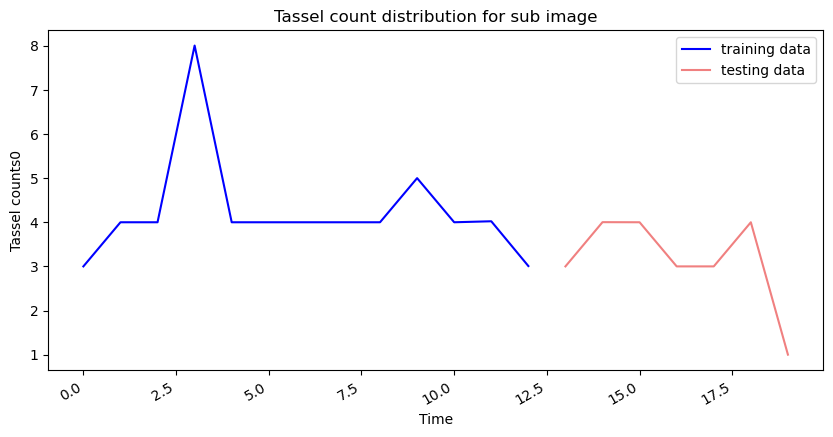

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_tassel_count_data(train_counts, test_counts, 0, (fig, ax))

In [33]:
# tfp particulars
tfd = tfp.distributions
root = tfd.JointDistributionCoroutine.Root

In [34]:
run_mcmc = tf.function(
    tfp.experimental.mcmc.windowed_adaptive_nuts,
    autograph=False, jit_compile=True)

In [35]:
# let's first add a column for the intercept - to add this to the beggining use insert instead of the regular way
sub_image_0_df.insert(0, 'intercept', np.repeat(1, sub_image_0_df.shape[0]))
sub_image_0_df['intercept'] = sub_image_0_df['intercept'].astype("float32")
# sub_image_0_df

In [36]:
sub_image_0_df.head()

,intercept,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,tassel_count
0,1.0,0.047808,0.0,0.163277,0.0,0.0,0.139760,0.118066,0.119409,0.126903,...,0.0,0.0,0.074895,0.166230,0.0,0.175070,0.0,0.0,0.234499,3.000005
1,1.0,0.051878,0.0,0.199874,0.0,0.0,0.173280,0.152892,0.153999,0.185454,...,0.0,0.0,0.120129,0.210222,0.0,0.216824,0.0,0.0,0.299341,4.000000
2,1.0,0.028427,0.0,0.146221,0.0,0.0,0.107724,0.101584,0.091895,0.107017,...,0.0,0.0,0.051440,0.120263,0.0,0.135184,0.0,0.0,0.200811,4.000155
3,1.0,0.067860,0.0,0.194141,0.0,0.0,0.167222,0.153346,0.156017,0.171351,...,0.0,0.0,0.114997,0.195980,0.0,0.199689,0.0,0.0,0.285783,8.004741
4,1.0,0.000000,0.0,0.159352,0.0,0.0,0.127940,0.099525,0.103640,0.109911,...,0.0,0.0,0.059292,0.179243,0.0,0.174193,0.0,0.0,0.228390,4.000000


In [37]:
X_preds = sub_image_0_df.iloc[:, :-1]

In [38]:
X_preds.shape

(20, 33)

In [39]:
X_preds.head()

,intercept,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31
0,1.0,0.047808,0.0,0.163277,0.0,0.0,0.139760,0.118066,0.119409,0.126903,...,0.224370,0.0,0.0,0.074895,0.166230,0.0,0.175070,0.0,0.0,0.234499
1,1.0,0.051878,0.0,0.199874,0.0,0.0,0.173280,0.152892,0.153999,0.185454,...,0.271945,0.0,0.0,0.120129,0.210222,0.0,0.216824,0.0,0.0,0.299341
2,1.0,0.028427,0.0,0.146221,0.0,0.0,0.107724,0.101584,0.091895,0.107017,...,0.169587,0.0,0.0,0.051440,0.120263,0.0,0.135184,0.0,0.0,0.200811
3,1.0,0.067860,0.0,0.194141,0.0,0.0,0.167222,0.153346,0.156017,0.171351,...,0.253660,0.0,0.0,0.114997,0.195980,0.0,0.199689,0.0,0.0,0.285783
4,1.0,0.000000,0.0,0.159352,0.0,0.0,0.127940,0.099525,0.103640,0.109911,...,0.219698,0.0,0.0,0.059292,0.179243,0.0,0.174193,0.0,0.0,0.228390


In [40]:
# This X_preds above is a dataframe, let's make it a numpy array
X_pred = X_preds.values

In [41]:
# n_preds would be the number of X variables we have which is 32 + 1 along with the intercept
n_pred = X_pred.shape[1]
n_pred

33

In [42]:
def get_prioirs_and_x_beta():
    beta = yield root(tfd.Sample(
        tfd.Normal(0., 1.),
        sample_shape=n_pred,
        name='beta'))
    x_beta = tf.einsum('ij,...j->...i', X_pred, beta)

    noise_sigma = yield root(tfd.HalfNormal(scale=2., name='noise_sigma'))

    intercept_data = sub_image_0_df['intercept']

    return x_beta, intercept_data, noise_sigma

In [43]:
# well we do need a trend variable, because the AR function has a zeros like input based on trend as the strating values.

In [44]:
# spend some time here to properly do the function to implement the mcmc procedure

In [45]:
def generate_model_ar_latent(training=True):

    @tfd.JointDistributionCoroutine
    def model_with_latent_ar():
        x_beta, intercept_data, noise_sigma = yield from get_prioirs_and_x_beta()
        
        # Latent AR(1)
        ar_sigma = yield root(tfd.HalfNormal(.1, name='ar_sigma'))
        rho = yield root(tfd.Uniform(-1., 1., name='rho'))
        def ar_fun(y):
            loc = tf.concat([tf.zeros_like(y[..., :1]), y[..., :-1]],
                            axis=-1) * rho[..., None]
            return tfd.Independent(
                tfd.Normal(loc=loc, scale=ar_sigma[..., None]),
                reinterpreted_batch_ndims=1)
        temporal_error = yield tfd.Autoregressive(
            distribution_fn=ar_fun,
            sample0=tf.zeros_like(intercept_data),
            num_steps=intercept_data.shape[-1],
            name='temporal_error')

        # Linear prediction
        y_hat = x_beta + temporal_error
        if training:
            y_hat = y_hat[..., :train_data.shape[0]]

        # Likelihood
        observed = yield tfd.Independent(
            tfd.Normal(y_hat, noise_sigma[..., None]),
            reinterpreted_batch_ndims=1,
            name='observed'
        )

    return model_with_latent_ar

In [46]:
%%time
gam_with_latent_ar = generate_model_ar_latent(training = True)

CPU times: user 636 µs, sys: 748 µs, total: 1.38 ms
Wall time: 1.41 ms


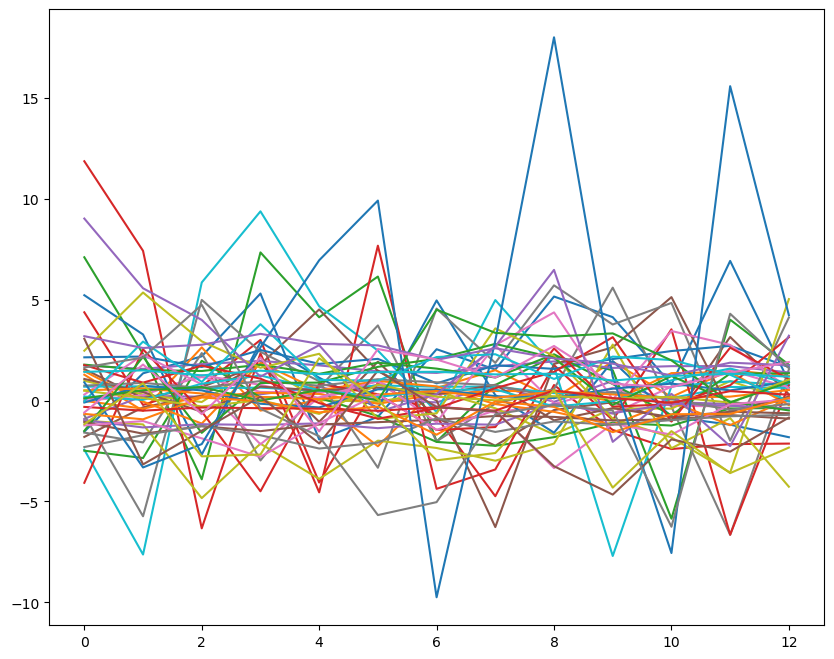

CPU times: user 1.14 s, sys: 230 ms, total: 1.37 s
Wall time: 1.35 s


In [47]:
%%time
plt.figure(figsize = (10,8))
plt.plot(tf.transpose(gam_with_latent_ar.sample(50)[-1]))
plt.show()

In [48]:
# sub_image_0_df['intercept'].astype("float32")

In [49]:
train_counts = train_counts.astype("float32")
test_counts = test_counts.astype("float32")

In [50]:
%%time
# The mcmc with nuts sample happens below
mcmc_samples_bts, sampler_stats_bts = run_mcmc(
    1000, gam_with_latent_ar, n_chains=4, num_adaptation_steps=1000,
    seed=tf.constant([36245, 734565], dtype=tf.int32),
    observed=train_counts.T)

2024-06-24 09:49:52.653092: I external/local_xla/xla/service/service.cc:168] XLA service 0x56515f70e3d0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-06-24 09:49:52.653163: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2024-06-24 09:49:53.234318: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:38] Ignoring Assert operator chain_of_default_joint_bijector_of_restructure/ldj_reduction_ndims/assert_equal_1/Assert/Assert
2024-06-24 09:49:53.249691: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:38] Ignoring Assert operator chain_of_default_joint_bijector_of_restructure_of_jointmap_of_reshape_and_reshape_1_and_reshape_2_and_reshape_3_and_reshape_4/ldj_reduction_ndims_5/assert_equal_1/Assert/Assert
2024-06-24 09:49:53.311991: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-

CPU times: user 35.8 s, sys: 1.3 s, total: 37.1 s
Wall time: 37.6 s


In [51]:
# sampler_stats_bts

In [52]:
gam_with_latent_ar_full_bts = generate_model_ar_latent(training=False)
posterior_dists_bts, ppc_samples_bts = gam_with_latent_ar_full_bts.sample_distributions(value=mcmc_samples_bts)

In [53]:
len(mcmc_samples_bts)

5

In [54]:
nchains = 4

CPU times: user 151 ms, sys: 26.3 ms, total: 177 ms
Wall time: 150 ms


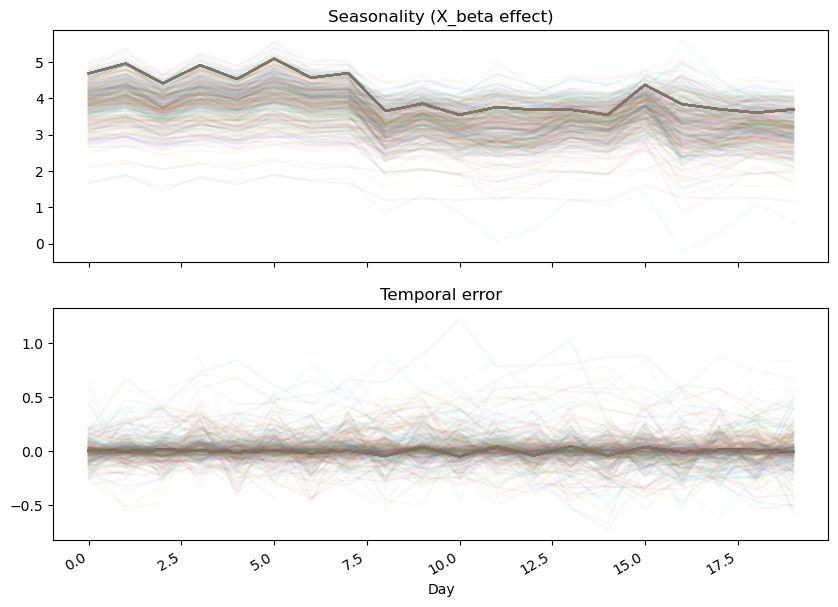

In [55]:
%%time
# plot components
fig, ax = plt.subplots(2, 1, figsize=(10, 7.5), sharex=True)

beta = mcmc_samples_bts[0]
seasonality_posterior = tf.einsum('ij,...j->...i', X_pred, beta)
temporal_error = mcmc_samples_bts[-1]
# temporal_error_ = mcmc_samples[7]
# temporal_error = tf.concat([tf.zeros_like(temporal_error_[..., :1]),
#                             temporal_error_], axis=-1)

for i in range(nchains):
    ax[0].plot(np.arange(20), seasonality_posterior[-100:, i, :].numpy().T, alpha=.05);
    ax[1].plot(np.arange(20), temporal_error[-100:, i, :].numpy().T, alpha=.05);

ax[0].set_title('Seasonality (X_beta effect)')
ax[1].set_title('Temporal error')
ax[1].set_xlabel("Day")
fig.autofmt_xdate()

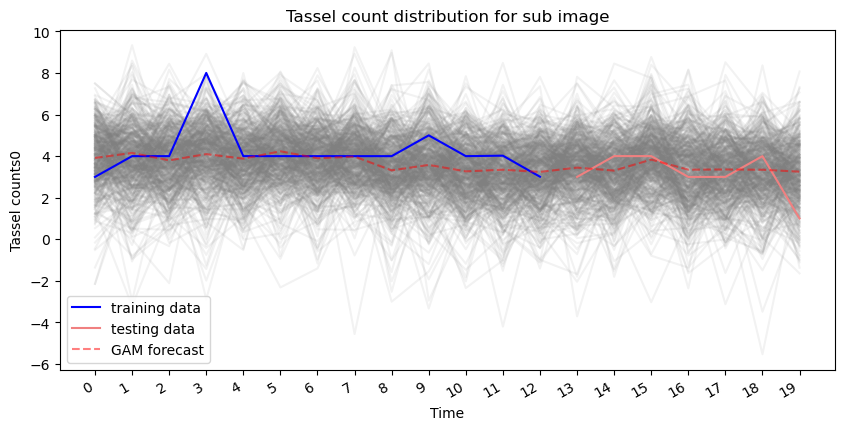

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# fitted_with_forecast = posterior_dists[-1].distribution.mean().numpy()
# fitted_with_forecast = posterior_dists[-1].distribution.sample().numpy()
fitted_with_forecast = ppc_samples_bts[-1].numpy()

ax.plot(np.arange(20), fitted_with_forecast[:250, 0, :].T, color='gray', alpha=.1);
ax.plot(np.arange(20), fitted_with_forecast[:250, 1, :].T, color='gray', alpha=.1);

plot_tassel_count_data(train_counts, test_counts, 0, (fig, ax))

average_forecast = np.mean(fitted_with_forecast, axis=(0, 1)).T
ax.plot(np.arange(20), average_forecast, ls='--', label='GAM forecast', color = 'red', alpha=.5);
plt.xticks(np.arange(20))
plt.legend()
plt.show()

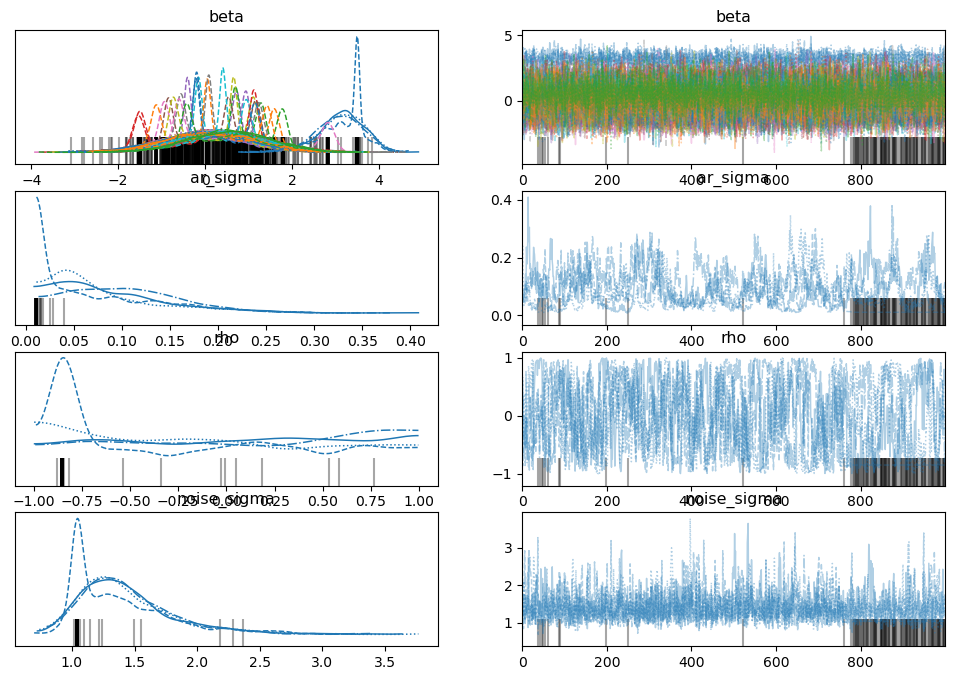

In [57]:
# Let's also get the posterior plots
nuts_trace_ar_latent = az.from_dict(
    posterior={
        k:np.swapaxes(v.numpy(), 1, 0)
        for k, v in mcmc_samples_bts._asdict().items()},
    sample_stats={
        k:np.swapaxes(sampler_stats_bts[k], 1, 0)
        for k in ["target_log_prob", "diverging", "accept_ratio", "n_steps"]}
)

axes = az.plot_trace(
    nuts_trace_ar_latent,
    var_names=['beta', 'ar_sigma', 'rho', 'noise_sigma'],
    compact=True);

In [58]:
# posterior parameter summary
parameter_summary = az.summary(nuts_trace_ar_latent)

In [59]:
parameter_summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
ar_sigma,0.086,0.061,0.010,0.199,0.007,0.005,33.0,11.0,1.10
beta[0],3.148,0.525,2.147,4.074,0.019,0.013,847.0,1786.0,1.01
beta[1],0.213,1.017,-1.739,1.894,0.099,0.070,118.0,1908.0,1.03
beta[2],0.136,1.001,-1.770,1.915,0.081,0.057,175.0,2562.0,1.02
beta[3],0.265,1.079,-1.550,2.195,0.123,0.087,82.0,13.0,1.04
beta[4],0.120,0.989,-1.726,1.946,0.020,0.018,2389.0,2069.0,1.01
beta[5],0.066,0.971,-1.655,1.952,0.050,0.035,438.0,2361.0,1.01
beta[6],0.442,1.118,-1.270,2.830,0.190,0.199,48.0,3025.0,1.06
beta[7],0.274,0.979,-1.721,1.999,0.052,0.037,380.0,2778.0,1.01
beta[8],0.277,0.953,-1.565,2.045,0.016,0.015,3580.0,2670.0,1.00


In [60]:
# how many parameters do we have?
parameter_summary.shape

(56, 9)